# 1- Processing and Creating Predictive models for Academic Buildings by Using Bigdata Technology (Regression Problem)

In this project the University of Dayton campus buildings selected to develop and validate the knowledge discovery models to understand the behavior of energy consumption, we will use the campus buildings to understand the underlying behavior and attempt to use knowledge discovery methods (KDD) to gain knowledge about various campus buildings.

Certainly, the behavior of building will depend on the activities that occur in it. For instance, the activities in the library building will appear to be more energy consuming during the weekends, classrooms more occupied during the class time which will vary roughly from 8 A.M to 12 P.M. and so on. One of the important values we can get from this project using the knowledge discovery in addition to the general building behavior is the range and the amount of energy for the specific hour. Another important task in buildings is accurate energy prediction; this is useful because the institution owners need to make sure that they have the amount of energy needed at the particular time. Due to energy deregulation plan the building owners need to submit the amount of energy needed for the next 24 hours to the utility providers (short-term prediction requirement), or they need to know how much energy needed at each building monthly (medium-term prediction), and the amount of energy needed if they plan to extend the institute or plan for policy. Before we describe the tasks we will use to accomplish the above-mentioned problems, we will describe the datasets.

Using Bigdata Technology (Hadoop and Spark) we can accelerate the process of predictive models by putting them in the external server or distribute them to be processed in parallel in and out core instead of traditional computing.



# 2 - Gas sensors for home activity monitoring Data Set (Classification Problem)

# STEPS (the objective and the appraoch)

* In this task I tackled 3 aspects in the deep learning :

    * Increase the hidden layers (how much the dataset will improve increasing the hidden layers?)
    * Increase the dataset samples (increasing the number of observation how much will change the accuracy?)
    * increase the number of neurons (increase the number of neurons how much will impact the model?)
* Becasue of huge number of observation (919438)First tested only 1000 sample (shown in subsetting section) from the dataset to make the model will run properly without loading the computer processor. Second tested 10000 instance, finally added all of the sample.

* The data devided to ( training set, training set labels, test set, test set labels) at each tree partion. This partionong also provided some sense about the classification model behaviour while increasing the data

* Also tested adding layer hidden layers more than 5 -starting from 5 hidden layers to 7 layers

* A Multilayer Perceptron (Neural Network) implemented from example using TensorFlow library. 

* The accuracy of the model at each stage provided in the conclution part

# Data


* The data from UCI (**Gas sensors for home activity monitoring Data Set**)  used for implementing classification deep learning algorithm. we are trying using many attributes from gas sensors.

* In this assignment we will learning to impelement TensorFlow for the classification setting. 

 The orginal files from UCI in the zip file are:
* HT_Sensor_dataset.dat
* HT_Sensor_metadata.dat

Then preprossesed and saved the data in name(merged_data.csv) addithinal modification made in excel and uploaded(merged_data2.csv)


The dataset is composed of 100 snippets of time series, each being a single induction or background activity. On total, there are **919438** points(No. of observations). For each induction, the time when the stimulus was presented is set to zero. For the actual time, see column t0 of the metadata file. In file HT_Sensor_dataset.dat, each column has a title according to the following 

* **id**: identification of the induction, to be matched with id in file HT_Sensor_metadata.dat; 
* **time**: time in hours, where zero is the start of the induction; 
* **R1 to R8**: value of each of the 8 MOX sensors resistance at that time; 
* **Temp.**: measurement of temperature in Celsius at that time; 
* **Humidity**: measurement of humidity in percent at that time. 


**Temperature** and **humidity** were measured using the Sensirion SHT75. The 8 MOX sensors are commercially available from Figaro, and are detailed below: 

* R1: TGS2611 
* R2: TGS2612 
* R3: TGS2610 
* R4: TGS2600 
* R5: TGS2602 
* R6: TGS2602 
* R7: TGS2620 
* R8: TGS2620 

The goal (<font color="red"> Target </font>  ) is to predict the class of the object whether it is banana, wine, or background (3 classess).

also related reseach paper to the dataset at: https://arxiv.org/pdf/1608.01719v1.pdf

In [ ]:
#start anaconda 3

$ source ~/anaconda3/bin/activate root
$ anaconda-navigator

In [ ]:
#Downloading pyspark with pip
$ pip install pyspark


In [ ]:
#Downloading Spark with Homebrew
# Search for spark
$ brew search spark

# Get more information on apache-spark
$ brew info apache-spark

# Install apache-spark
$ brew install apache-spark

In [ ]:
#Download and Set Up Spark (built on top of Hadoop)
$ tar xvf spark-2.2.0-bin-hadoop2.7.tgz

$ mv spark-2.1.0-bin-hadoop2.7 /usr/local/spark


In [ ]:
hduser@ahmed:~$ pyspark
Python 2.7.12 (default, Dec  4 2017, 14:50:18) 
[GCC 5.4.0 20160609] on linux2
Type "help", "copyright", "credits" or "license" for more information.
2018-05-01 04:02:37 WARN  Utils:66 - Your hostname, ah-pc resolves to a loopback address: 127.0.1.1; using 192.168.0.8 instead (on interface wlp3s0)
2018-05-01 04:02:37 WARN  Utils:66 - Set SPARK_LOCAL_IP if you need to bind to another address
2018-05-01 04:02:37 WARN  NativeCodeLoader:62 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.3.0
      /_/

Using Python version 2.7.12 (default, Dec  4 2017 14:50:18)
SparkSession available as 'spark'.


In [59]:
# Python library imports: numpy, random, sklearn, pandas, etc

import warnings
warnings.filterwarnings('ignore')

import sys
import random
import numpy as np

from sklearn import linear_model, cross_validation, metrics, svm
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Import findspark 
import findspark

# Initialize and provide path
findspark.init("/usr/local/spark")

# Or use this alternative
#findspark.init()

In [5]:
# Import SparkSession
from pyspark.sql import SparkSession

# Build the SparkSession
spark = SparkSession.builder \
   .master("local") \
   .appName("Linear Regression Model") \
   .config("spark.executor.memory", "1gb") \
   .getOrCreate()
   
sc = spark.sparkContext

In [7]:
!export SPARK_HOME="/usr/local/spark/"


In [8]:
# Set a fixed value for the hash seed secret
!export PYTHONHASHSEED=0

# Set an alternate Python executable
!export PYSPARK_PYTHON=/usr/local/ipython/bin/ipython

# Augment the default search path for shared libraries
!export LD_LIBRARY_PATH=/usr/local/ipython/bin/ipython

# Augment the default search path for private libraries 
!export PYTHONPATH=$SPARK_HOME/python/lib/py4j-*-src.zip:$PYTHONPATH:$SPARK_HOME/python/

In [18]:
# Load in the data
rdd = sc.textFile('/home/hduser/month1_RL.csv')

# Load in the header
#header = sc.textFile('/Users/yourName/Downloads/CaliforniaHousing/cal_housing.domain')

In [29]:
import csv
'''rdd = sc.textFile("/home/hduser/month1_RL.csv")
rdd = rdd.mapPartitions(lambda x: csv.reader(x))'''

lines=sc.textFile("hdfs:///month1_RL.csv")


In [40]:
readme = sc.textFile("./month1_RL.csv")


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.regression import LinearRegression

In [15]:
#
from pyspark.sql import SparkSession

spark_session = SparkSession.builder.getOrCreate()

In [ ]:
# Import the necessary modules 
from pyspark.sql import Row

# Map the RDD to a DF
df = rdd.map(lambda line: Row(longitude=line[0], 
                              latitude=line[1], 
                              housingMedianAge=line[2],
                              totalRooms=line[3],
                              totalBedRooms=line[4],
                              population=line[5], 
                              households=line[6],
                              medianIncome=line[7],
                              medianHouseValue=line[8])).toDF()

In [ ]:
#Installing docker.io
!sudo apt install docker.io

In [ ]:
#Installing pydoop using docker
!sudo docker pull crs4/pydoop

In [ ]:
#Checking the path of java
#https://askubuntu.com/questions/772235/how-to-find-path-to-java

root@ahmed$ whereis java

java: /usr/bin/java /usr/share/java /usr/share/man/man1/java.1.gz

#OR

export JAVA_HOME=$(dirname $(dirname $(update-alternatives --list javac)))


$ update-alternatives --list java
/usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

$ update-alternatives --list javac
/usr/lib/jvm/java-8-openjdk-amd64/bin/javac

#OR
readlink -f /usr/bin/java | sed "s:bin/java::"

In [ ]:
#pydoop installation
sudo apt-get -y install build-essential python-dev
sudo bash    # To avoid sudo pip install not geting the env variables
export HADOOP_HOME=/usr/local/hadoop-3.1.0
export JAVA_HOME=/usr/lib/jvm/java-8-oracle/jre/bin/java
pip install pydoop

In [22]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.regression import LinearRegression


In [27]:
%matplotlib inline
import pandas as pd
import numpy as np

dataset = pd.read_csv('HT_Sensor_dataset.csv',encoding='utf-7')
dataset.columns = ['id','time','R1','R2','R3','R4','R5','R6','R7','R8','Temp.','Humidity']
#dataset.set_index('id',inplace = True)
dataset.head()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
0,0,-0.99975,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


In [28]:
output = pd.read_csv('HT_Sensor_metadata.csv',encoding='utf-7')
output.columns = ['id','date','class','t0','dt']
#output.set_index('id',inplace = True)
output.head()

,id,date,class,t0,dt
0,0,07-04-15,banana,13.49,1.64
1,1,07-05-15,wine,19.61,0.54
2,2,07-06-15,wine,19.99,0.66
3,3,07-09-15,banana,6.49,0.72
4,4,07-09-15,wine,20.07,0.53


In [29]:
df3 = pd.merge(dataset, output)

In [30]:
df3.head()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity,date,class,t0,dt
0,0,-0.99975,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528,07-04-15,banana,13.49,1.64
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299,07-04-15,banana,13.49,1.64
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093,07-04-15,banana,13.49,1.64
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905,07-04-15,banana,13.49,1.64
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736,07-04-15,banana,13.49,1.64


In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter


LISTINGSFILE = '/home/hduser/month1_RL.csv'

cols = ['price',
        'accommodates',
        'bedrooms',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'instant_bookable',
        'reviews_per_month',
        'number_of_reviews',
        'availability_30',
        'review_scores_rating'
        ]

# read the file into a dataframe
#df = pd.read_csv(LISTINGSFILE, usecols=cols)

len(df.index)

IndentationError: unexpected indent (<ipython-input-23-73bc9863461b>, line 17)

In [31]:
merged_data = pd.read_csv('merged_data2.csv',encoding='utf-7')


In [32]:
merged_data.head()

,Unnamed: 0,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity,date,class,dt
0,0,0,12.490250,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528,07-04-15,banana,1.64
1,1,0,12.490528,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299,07-04-15,banana,1.64
2,2,0,12.490806,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093,07-04-15,banana,1.64
3,3,0,12.491084,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905,07-04-15,banana,1.64
4,4,0,12.491373,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736,07-04-15,banana,1.64


In [33]:
merged_data.describe()

,Unnamed: 0,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity,dt
count,928991.0000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000
mean,464495.0000,49.256372,13.455743,12.185350,8.958396,8.945006,10.130319,15.154167,16.052371,5.390618,5.912815,27.283373,57.568023,0.819034
std,268176.7463,28.453089,4.833605,0.868116,1.558196,1.748622,1.711879,18.391606,3.303089,2.889244,3.304284,0.904537,4.821784,0.471101
min,0.0000,0.000000,4.620268,5.431460,1.820660,1.626900,2.282920,1.901290,5.587950,1.220370,1.430530,24.434400,44.660400,0.120000
25%,232247.5000,25.000000,8.966909,11.980000,8.298835,8.273455,9.347275,10.244600,14.780400,4.430490,4.877900,26.764900,53.938100,0.490000
50%,464495.0000,49.000000,13.723466,12.404700,9.462680,9.564520,10.651800,11.683500,16.521200,5.389800,5.799340,27.328400,57.180800,0.680000
75%,696742.5000,73.000000,16.640513,12.715500,10.095900,10.207900,11.400000,13.784400,17.353100,5.989300,6.585930,27.868700,60.563500,0.950000
max,928990.0000,99.000000,23.999967,13.733300,11.315500,11.374200,12.754800,378.750000,73.817800,102.575000,99.888100,30.325400,77.680500,2.310000


# DATA VISUALIZATION


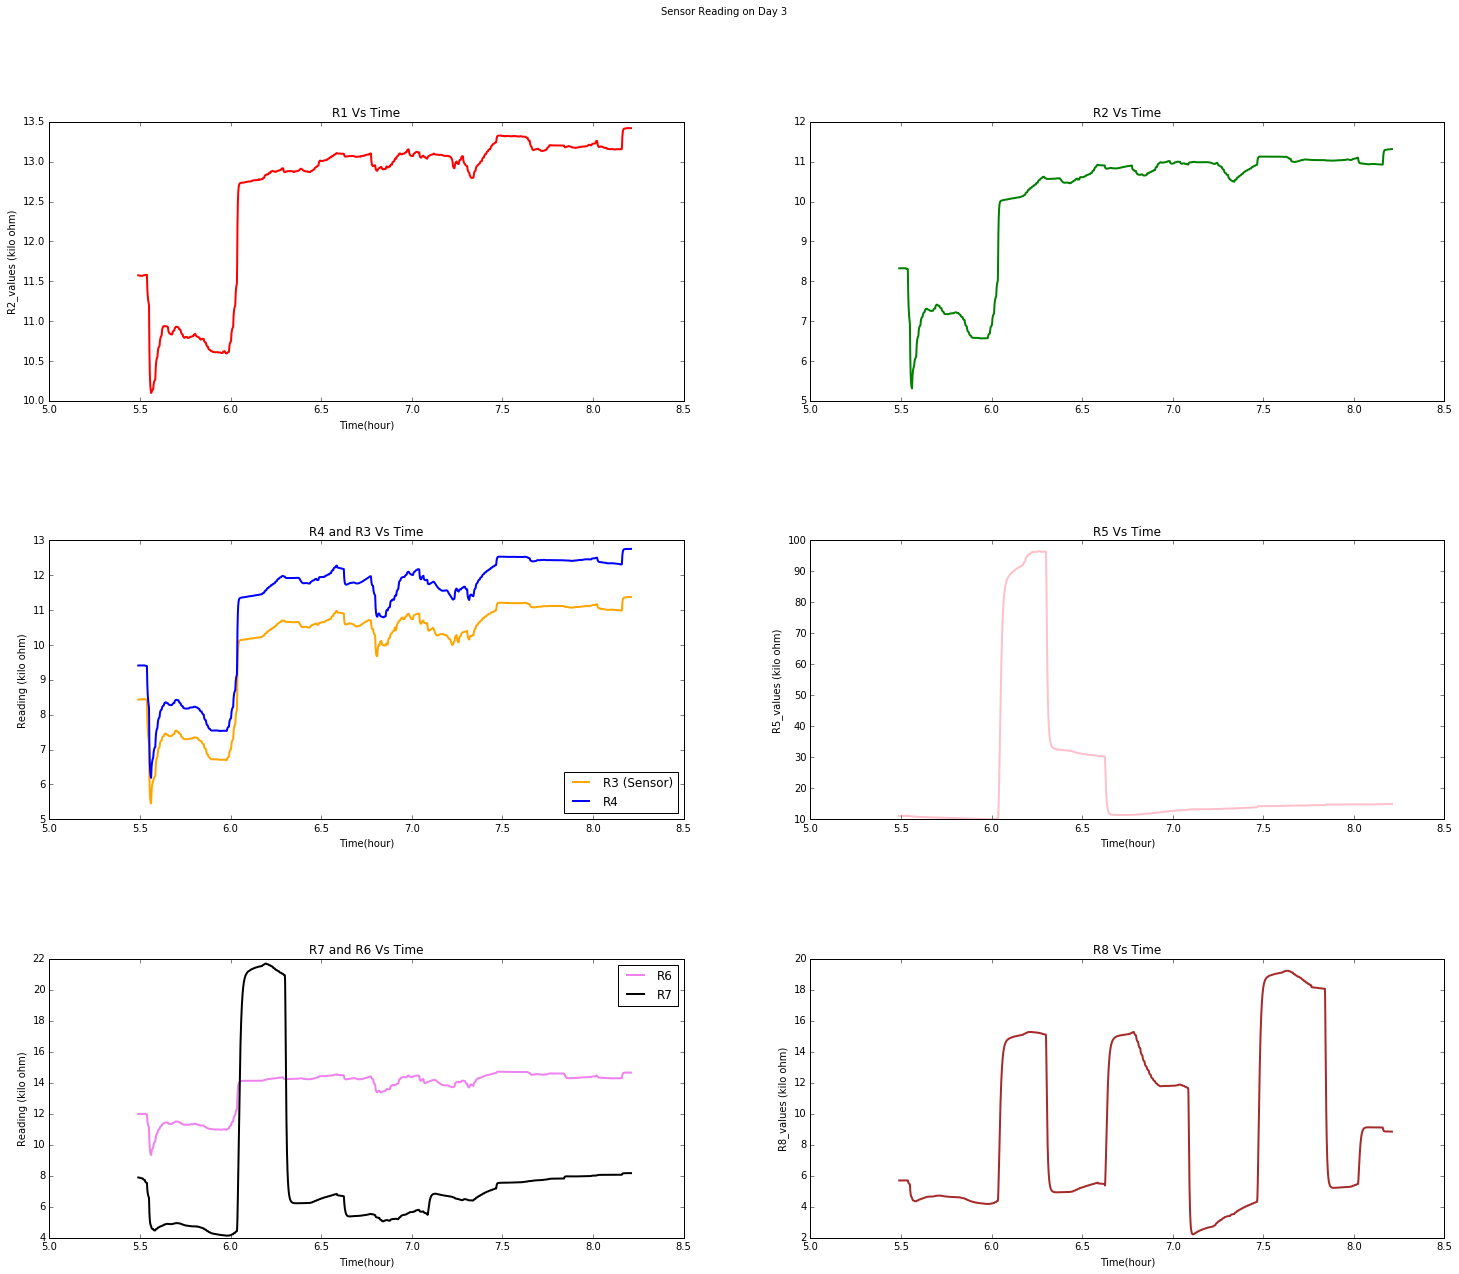

In [35]:
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import statsmodels.api as sm
#https://github.com/shubham0420/Gas-Sensor-for-Home-Activity-Monitoring-Dataset/blob/master/code/main_code_notebook.ipynb

fig, axes = plt.subplots(nrows=3, ncols=2)#, sharex=True, sharey=True)
fig.set_figheight(20)
fig.set_figwidth(25)
fig.subplots_adjust(hspace=.5)

axes[0,0].plot(merged_data.time[merged_data.id == 3],merged_data.R1[merged_data.id == 3],c = 'red',linewidth = '2.0')
axes[0,0].set_title('R1 Vs Time')
axes[0,0].set_xlabel('Time(hour)')
axes[0,0].set_ylabel('R1_values(kilo ohm)')

axes[0,1].plot(merged_data.time[merged_data.id == 3],merged_data.R2[merged_data.id == 3],c = 'green',linewidth = '2.0')
axes[0,1].set_title('R2 Vs Time')
axes[0,0].set_xlabel('Time(hour)')
axes[0,0].set_ylabel('R2_values (kilo ohm)')


axes[1,0].plot(merged_data.time[merged_data.id == 3],merged_data.R3[merged_data.id == 3],c = 'orange',linewidth = '2.0',label = 'R3 (Sensor)')
#axes[1,0].set_title('R3 Vs Time')
axes[1,0].set_xlabel('Time(hour)')
axes[1,0].set_ylabel('R3_values (kilo ohm)')


axes[1,0].plot(merged_data.time[dataset.id == 3],merged_data.R4[merged_data.id == 3],c = 'blue',linewidth = '2.0',label = 'R4')
axes[1,0].set_title('R4 and R3 Vs Time')
axes[1,0].set_xlabel('Time(hour)')
axes[1,0].set_ylabel('Reading (kilo ohm)')
axes[1,0].legend(loc = 4)

axes[1,1].plot(merged_data.time[merged_data.id == 3],merged_data.R5[merged_data.id == 3],c = 'pink',linewidth = '2.0')
axes[1,1].set_title('R5 Vs Time')
axes[1,1].set_xlabel('Time(hour)')
axes[1,1].set_ylabel('R5_values (kilo ohm)')
 

axes[2,0].plot(merged_data.time[dataset.id == 3],merged_data.R6[merged_data.id == 3],c = 'violet',linewidth = '2.0',label = 'R6')
#axes[2,0].set_title('R6 Vs Time')
axes[2,0].set_xlabel('Time(hour)')
axes[2,0].set_ylabel('R6_values (kilo ohm)')


axes[2,0].plot(merged_data.time[dataset.id == 3],merged_data.R7[merged_data.id == 3],c = 'black',linewidth = '2.0',label ='R7')
axes[2,0].set_title('R7 and R6 Vs Time')
axes[2,0].set_xlabel('Time(hour)')
axes[2,0].set_ylabel('Reading (kilo ohm)')
axes[2,0].legend()

axes[2,1].plot(merged_data.time[dataset.id == 3],merged_data.R8[dataset.id == 3],c = 'brown',linewidth = '2.0')
axes[2,1].set_title('R8 Vs Time')
axes[2,1].set_xlabel('Time(hour)')
axes[2,1].set_ylabel('R8_values (kilo ohm)')
plt.suptitle('Sensor Reading on Day 3')
pl.savefig("Graph1.png", dpi=300)

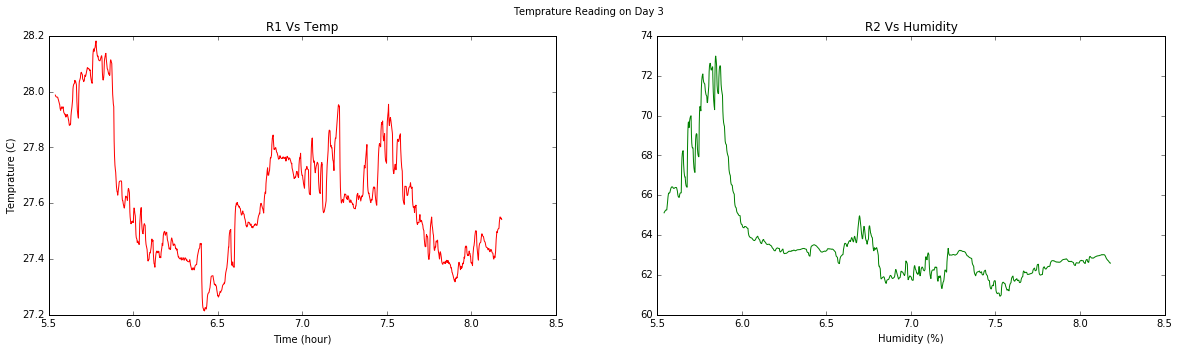

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2)#, sharex=True, sharey=True)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(hspace=.5)

axes[0].plot(merged_data.time[merged_data.id == 17],merged_data['Temp.'][merged_data.id == 17],c = 'r')
axes[0].set_title('R1 Vs Temp')
axes[0].set_xlabel('Time (hour)')
axes[0].set_ylabel('Temprature (C)')
axes[1].plot(merged_data.time[merged_data.id == 17],merged_data.Humidity[merged_data.id == 17],c = 'green')
axes[1].set_title('R2 Vs Humidity')
axes[1].set_xlabel('Humidity (%)')
plt.suptitle('Temprature Reading on Day 3')
pl.savefig("Graph2.png", dpi=300)

In [ ]:
#sudo python3 -m pip install seaborn

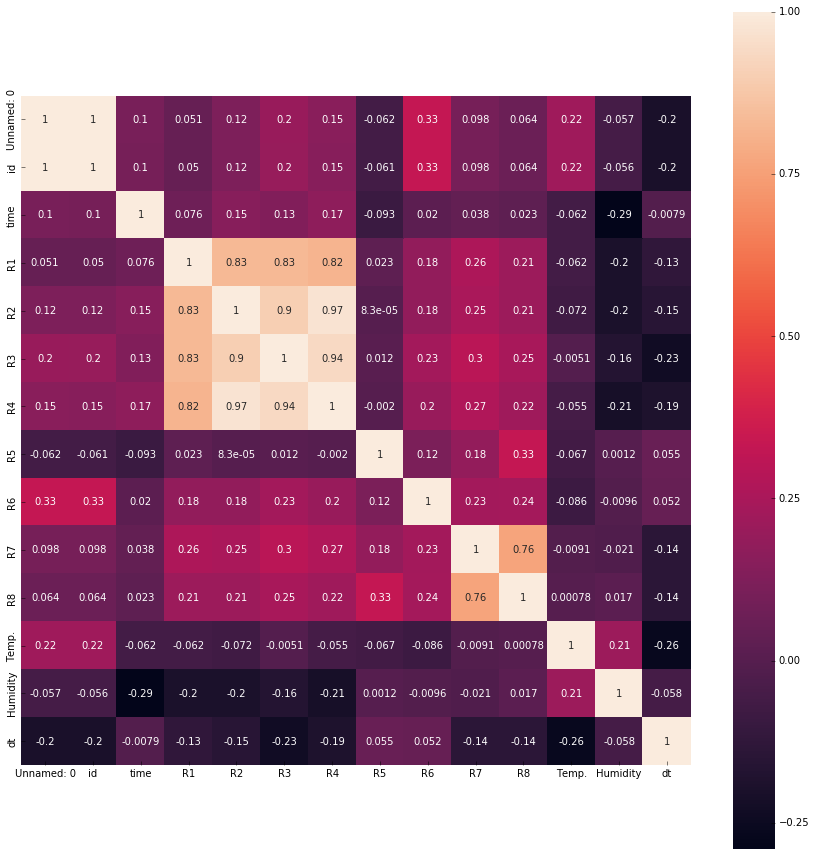

In [38]:
#Pearson method of correlation for all of the attributes

import seaborn as sns
features_mean = merged_data[:3]
plt.figure(figsize=(15,15))
heat = sns.heatmap(merged_data.corr(), vmax=1, square=True, annot=True)
plt.savefig('Pearson_correlation_plots')
plt.show(heat)


In [39]:
#Shuffle the dataset
merged_data_reshuffeled = merged_data.sample(frac = 0.1, random_state = 99)

In [40]:
print(merged_data_reshuffeled.head(5))

        Unnamed: 0  id       time       R1        R2        R3        R4  \
590572      590572  62  20.959083  11.2204   8.43325   6.87108   9.29366   
608251      608251  64  19.020811  10.7971   5.20652   5.71518   6.80934   
788868      788868  84  12.959943  12.4530  10.04000  10.16800  11.31410   
891276      891276  96  12.817509  12.1924   9.64215   9.92575  11.16200   
663571      663571  70  10.519448  12.4387   9.91084  10.06380  11.19460   

             R5       R6       R7       R8    Temp.  Humidity      date  \
590572  11.9003  15.2779  4.34916  5.11420  27.3937   59.5053  08-31-15   
608251  11.4123  15.1275  4.10208  4.55469  27.4751   50.2622  09-02-15   
788868  10.5532  16.5309  7.06960  7.36298  27.1800   64.8485  08-25-15   
891276  12.6327  16.3732  6.93123  6.13337  28.5291   56.8040  09-14-15   
663571  21.6506  15.4980  5.84068  7.54487  27.5110   60.8115  08-04-15   

             class    dt  
590572      banana  0.57  
608251        wine  0.39  
788868  bac

In [41]:
Xtrain = merged_data_reshuffeled.iloc[1:1000, 3:10]
ytrain = merged_data_reshuffeled.iloc[1:1000, 14]

Xtest = merged_data_reshuffeled.iloc[1000:1500, 3:10]
ytest = merged_data_reshuffeled.iloc[1000:1500, 14]


In [42]:
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(999, 7) (999,)
(500, 7) (500,)


In [43]:
X_train = Xtrain #X_train_features
Y_train = pd.get_dummies(ytrain) #target dummy variable


X_test = Xtest #ytest_features
Y_test = pd.get_dummies(ytest) #target dummy variable



In [44]:
print(Xtrain.size,ytrain.size)
print(Xtest.size,ytest.size)

6993 999
3500 500


In [45]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(999, 7) (999, 3)
(500, 7) (500, 3)


In [46]:
print("======== \n","These are the feature training-data:","\n",X_train.head(5))
print("======== \n","These are the target training-data:","\n",Y_train.head(5))

print("============================================ \n","============================================ \n",
      "These are the feature test-data:","\n",X_test.head(5))
print("======== \n","These are the target test-data:","\n",Y_test.head(5))

 These are the feature training-data: 
               R1        R2        R3        R4        R5        R6       R7
608251  10.79710   5.20652   5.71518   6.80934  11.41230  15.12750  4.10208
788868  12.45300  10.04000  10.16800  11.31410  10.55320  16.53090  7.06960
891276  12.19240   9.64215   9.92575  11.16200  12.63270  16.37320  6.93123
663571  12.43870   9.91084  10.06380  11.19460  21.65060  15.49800  5.84068
81752    8.71925   5.06839   3.89322   6.34424   5.64318   9.86898  2.80060
 These are the target training-data: 
         background  banana  wine
608251           0       0     1
788868           1       0     0
891276           1       0     0
663571           1       0     0
81752            0       0     1
 These are the feature test-data: 
              R1        R2        R3        R4       R5       R6       R7
829648  12.8336  10.70330  10.82980  12.09930  13.2454  17.7681  5.73544
673561  12.2924   9.26266   9.42741  10.47550  11.1926  17.7145  5.64914
789155  12.4

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Epoch: 0001 cost=8700.635036892
Epoch: 0002 cost=6435.990939670
Epoch: 0003 cost=4850.507676866
Epoch: 0004 cost=3966.007215712
Epoch: 0005 cost=3097.969916450
Epoch: 0006 cost=2371.100382487
Epoch: 0007 cost=1760.398464627
Epoch: 0008 cost=1249.233473036
Epoch: 0009 cost=832.760287815
Epoch: 0010 cost=568.014211019
Epoch: 0011 cost=490.334645589
Epoch: 0012 cost=390.802810669
Epoch: 0013 cost=328.959960938
Epoch: 0014 cost=263.897442288
Epoch: 0015 cost=204.792827182
Optimization Finished!
Accuracy: 0.448


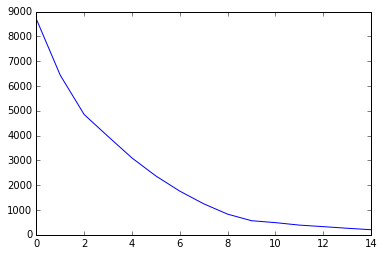

In [48]:
#https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/multilayer_perceptron.py


""" Multilayer Perceptron.
A Multilayer Perceptron (Neural Network) implementation example using
TensorFlow library. 
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
"""

from __future__ import print_function

import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 2 # 1st layer number of neurons
n_hidden_2 = 23 # 2nd layer number of neurons
n_hidden_3 = 25 # 3rd layer number of neurons
n_hidden_4 = 2 # 4th layer number of neurons
n_hidden_5 = 26 # 5th layer number of neurons

n_input = 7 #  data input 
n_classes = 3 # total classes 

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_hidden_5, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'b5': tf.Variable(tf.random_normal([n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


# Create model
def multilayer_perceptron(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    out_layer = tf.matmul(layer_5, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = multilayer_perceptron(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
    
# Initializing the variables
init = tf.global_variables_initializer()
epochs =np.zeros(training_epochs)

with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch=int(len(X_train) / batch_size)
        x_b = np.array_split(X_train, total_batch)
        y_b = np.array_split(Y_train, total_batch)
        total_batch = int(len(X_train)/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = x_b[i], y_b[i]

            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
        epochs[epoch] = avg_cost
    print("Optimization Finished!")
    
    # Test model
    pred = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
plt.plot(epochs)


# References:
* Pig installation
    https://writetosoumitra.blogspot.in/